# 20: Avelleneda-Stoikov Baseline Functionality

## Read Parquet file, parse as OrderEvents

In [1]:
import pandas as pd
import pyarrow as pa
import lob_market_making_sim.io.loader as loader
# Import dataframe that has been built previously
df = pd.read_parquet('data/parquet/AMZN_2025-06-12.parquet')

# Convert dataframe to Iterable[OrderEvent]
events = loader.arrow_to_events(pa.Table.from_pandas(df))

## Configure OrderBook, Engine, and Avellaneda Strategy

In [2]:
from lob_market_making_sim.core.order_book import OrderBookL1
from lob_market_making_sim.core.engine import ReplayEngine
from lob_market_making_sim.models.avellaneda import ASParams, AvellanedaStoikov
ob = OrderBookL1()
asparams = ASParams(gamma = .1,
                    kappa = 1.0,
                    sigma = 0.002,
                    qmax = 1000)
strategy = AvellanedaStoikov(params = asparams)
engine = ReplayEngine(ob, strategy)
engine.run(events)

quote_log = engine.quote_log

/Users/lucymalmud/Desktop/LOB-market-making-sim/lob-market-making-sim/src/lob_market_making_sim/core/order_book.py:97: UserWarning: Unknown order ID 11534792 - cannot execute EXECUTE_VISIBLE or CANCEL, skipping execution
  warnings.warn(f'Unknown order ID {ev.oid} - cannot execute EXECUTE_VISIBLE or CANCEL, skipping execution')
/Users/lucymalmud/Desktop/LOB-market-making-sim/lob-market-making-sim/src/lob_market_making_sim/core/order_book.py:97: UserWarning: Unknown order ID 14585251 - cannot execute EXECUTE_VISIBLE or CANCEL, skipping execution
  warnings.warn(f'Unknown order ID {ev.oid} - cannot execute EXECUTE_VISIBLE or CANCEL, skipping execution')
/Users/lucymalmud/Desktop/LOB-market-making-sim/lob-market-making-sim/src/lob_market_making_sim/core/order_book.py:97: UserWarning: Unknown order ID 3911376 - cannot execute EXECUTE_VISIBLE or CANCEL, skipping execution
  warnings.warn(f'Unknown order ID {ev.oid} - cannot execute EXECUTE_VISIBLE or CANCEL, skipping execution')
/Users/lucy

In [3]:
print(f'P&L: {engine.cash}')
print(f'inventory: {engine.inv}')

P&L: 708022.6953180804
inventory: 316274


## Plot quotes and midprices

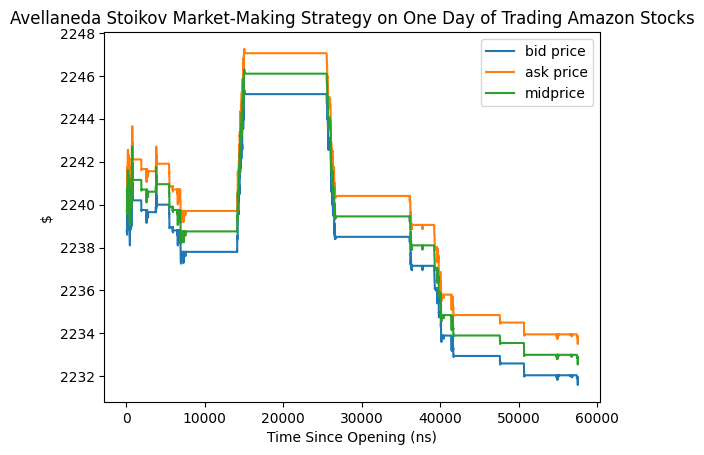

In [4]:
import matplotlib.pyplot as plt

# Drop the first 100 lines of data, as prices rise from 0
quote_df = pd.DataFrame(quote_log, columns=["timestamp", "bid", "ask", "midprice", "inventory"])[100:]
bid = quote_df["bid"]
ask = quote_df["ask"]
mid = quote_df["midprice"]

plt.plot(bid, label="bid price")
plt.plot(ask, label="ask price")
plt.plot(mid, label="midprice")
plt.xlabel("Time Since Opening (ns)")
plt.ylabel("$")
plt.title("Avellaneda Stoikov Market-Making Strategy on One Day of Trading Amazon Stocks")
plt.legend()